In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## input layer

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [6]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

### batch size, 이름 지정

In [8]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_4')>

In [10]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

## Dense Layer

- Fully connected layer

In [11]:
layers.Dense(10)

In [12]:
layers.Dense(10, name='layer1')

### 활성화 함수(activation) 지정

In [13]:
layers.Dense(10, activation='softmax')

In [14]:
layers.Dense(10, activation='relu', name='Dense Layer')

### (5, 2) 랜덤값을 입력으로 하여 Dense Layer를 통과 시킨 결과
- 결과는 (5, 10) 텐서

In [16]:
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.264212   0.88392115]
 [0.11081052 0.7262325 ]
 [0.20273209 0.3745551 ]
 [0.5683526  0.02011859]
 [0.02595997 0.24767864]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_3/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.67698985, -0.56744254, -0.00411808, -0.5584206 , -0.24561244,
         0.03657842,  0.610771  ,  0.26128334,  0.5103081 , -0.08834386],
       [ 0.4121577 , -0.21875513, -0.23368892,  0.70049506,  0.16733241,
        -0.46975663, -0.6439586 ,  0.37553757,  0.29688996,  0.3345831 ]],
      dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.54318374 0.         0.         0.47164097 0.0830149  0.
  0.         0.4009798  0.39725682 0.27240357]
 [0.37433994 0.         0.         0.44684342 0.0943058  0.
  0.         

## Activation Layer

- 활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할
- 크게 선형 활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분
- 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 **비선형 활성화 함수** 를 사용
- 케라스의 Dense 레이어에서 미리 활성화 함수를 지정할 수도 있지만, 필요에 따라 별도의 Activation 레이어를 만들어줄 수 있다.

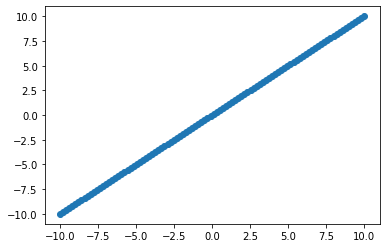

In [17]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

### 시그모이드 함수

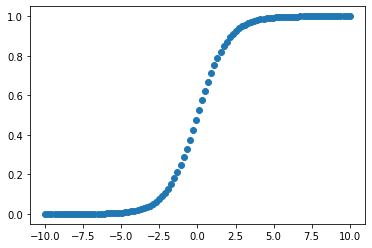

In [18]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

### 하이퍼볼릭 탄젠트 함수

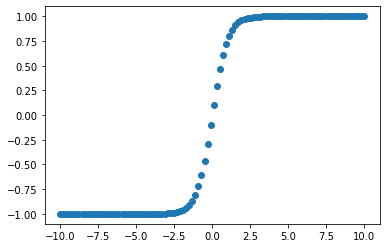

In [20]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

### ReLU 함수

- 출력값은 0부터 무한대까지의 범위의 값을 가지므로 하이퍼볼릭 탄젠트 함수보다 몇 배는 더 빠르게 훈련
- ReLU 함수 출력값이 0이 중심이 아니고, 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제가 있음

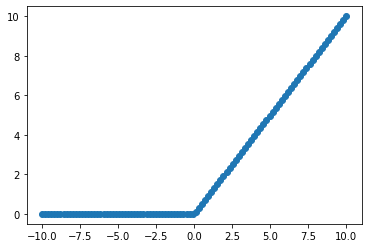

In [21]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

### Leaky ReLU 함수

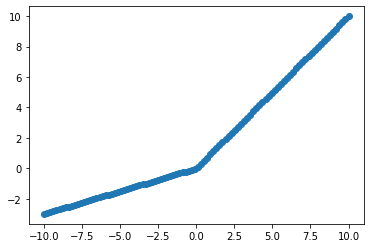

In [23]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

### ELU 함수
- ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수
-  0 이하에서는 exponential 연산이 수행되므로 계산 비용이 높아지는 단점

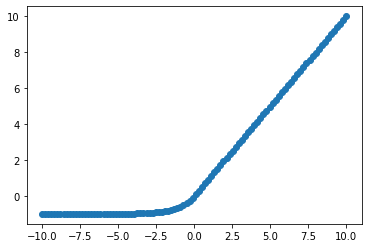

In [25]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

## Flatten 레이어
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환

In [26]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


In [27]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


# 3-3. 딥러닝 모델
- Sequential
- Functional
- Subclassing


In [28]:
from tensorflow.keras import models, utils

## Sequential API
- 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없다

In [29]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_5 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_6 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


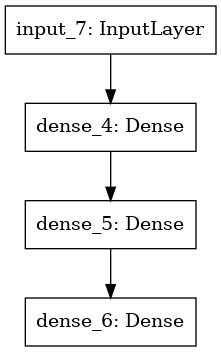

In [30]:
utils.plot_model(model)

In [31]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


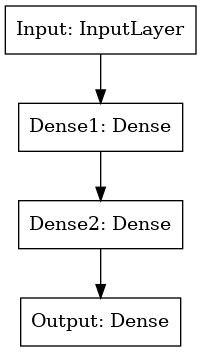

In [33]:
utils.plot_model(model)

## Functional API
- 가장 권장되는 방법입
- 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있다.

In [34]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


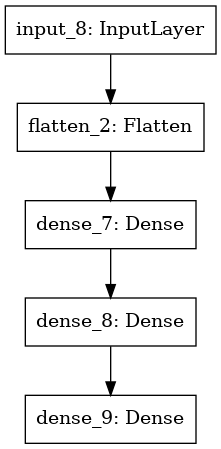

In [35]:
utils.plot_model(model)

Input 객체를 여러 레이어에서 사용하는 것이 가능합니다. 아래의 예제에서는 Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합하였습니다.

In [36]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 28, 100)      2900        input_9[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 28, 30)       3030        dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_9[0][0]                    
                                                                 dense_11[0][0]             

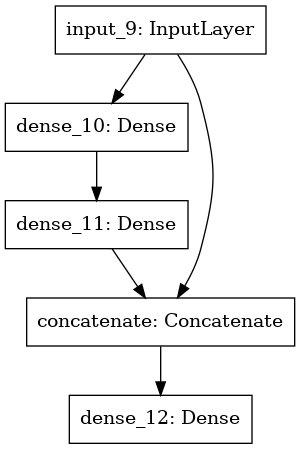

In [37]:
utils.plot_model(model)

In [38]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 100)      2900        Input_2[0][0]                    
__________________________________________________________________________________________________
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 10)       1010        dense_13[0][0]                   
____________________________________________________________________________________________

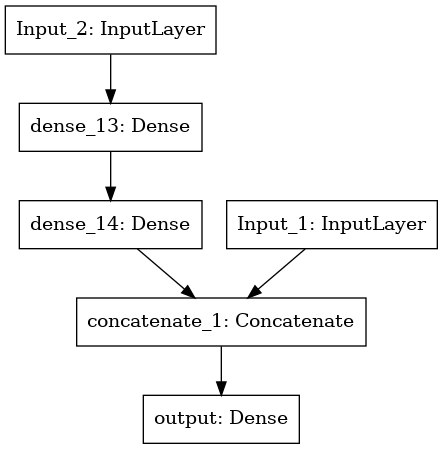

In [39]:
utils.plot_model(model)

 - 결과를 여러개로 나눠서 사용하는 것도 가능

In [40]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 10)       1010        dense_15[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_16[0][0]                   
____________________________________________________________________________________________

In [41]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10, 10)       1010        dense_17[0][0]                   
____________________________________________________________________________________________

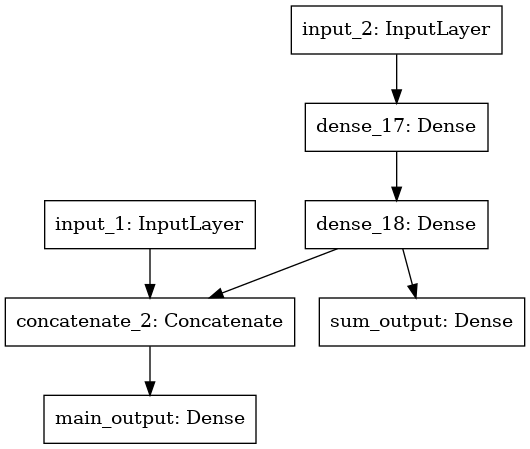

In [42]:
utils.plot_model(model)

## Subclassing API

서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로, Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있습니다.

- fit(): 모델 학습
- evaluate(): 모델 평가
- predict(): 모델 예측
- save(): 모델 저장
- load(): 모델 불러오기
- call(): 메소드안에서 원하는 계산 가능

Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만, 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 합니다.

In [43]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

In [44]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape = (100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation = "relu"))
# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation = "relu"))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_20 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [45]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape = (100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten()(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation = "relu")(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation = "relu")(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation = "softmax")(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_23 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [46]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation = "relu")
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation = "relu")
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation = "relu")

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_25 (Dense)             multiple                  12000400  
_________________________________________________________________
dense_26 (Dense)             multiple                  80200     
_________________________________________________________________
dense_27 (Dense)             multiple                  20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Functional API 방식 혹은 Subclassing API 방식으로 구현해주세요.

input_1 = layers.Input(shape=(40))
input_2 = layers.Input(shape=(10))
hidden1 = layers.Dense(100, activation = "relu")(input_1)
hidden2 = layers.Dense(100, activation = "relu")(input_2)
concat = layers.Concatenate()([hidden1, hidden2])
hidden4 = layers.Dense(40, activation = "relu")(concat)
output_1 = layers.Dense(10, activation = "softmax")(hidden4)
output_2 = layers.Dense(1, activation = "sigmoid")(concat)

model = models.Model(inputs = [input_1, input_2], outputs = [output_1, output_2])
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 100)          4100        input_12[0][0]                   
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 100)          1100        input_13[0][0]                   
____________________________________________________________________________________________

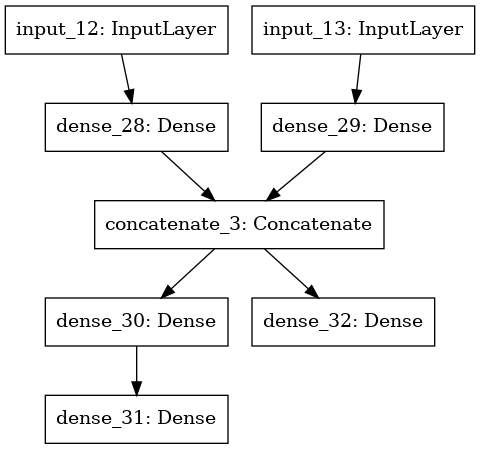

In [48]:
utils.plot_model(model)